In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import timeit
from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.layers import SimpleRNN, LSTM, GRU
import pandas


In [2]:
df = pd.read_excel('data.xlsx', index_col=0) 
df.head()

,bResult,rResult,game_id,minute,League,Year,Season,Type,blueTeamTag,redTeamTag,...,killsredTop,killsredJungle,killsredMiddle,killsredADC,killsredSupport,killsblueTop,killsblueJungle,killsblueMiddle,killsblueADC,killsblueSupport
0,1,0,0,1,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,4,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,5,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#only nummeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = df.select_dtypes(include=numerics)

In [14]:
#split data into train en test
unique_game_id = df.game_id.unique()
train_game_id , test_game_id= train_test_split(unique_game_id,test_size=0.30, random_state=42)

test_data = df[df.game_id.isin(test_game_id)]
train_data = df[df.game_id.isin(train_game_id)]
xtest = test_data.drop("bResult",axis=1)
xtest = xtest.drop("rResult",axis=1)
ytest = test_data.bResult
xtrain = train_data.drop("bResult",axis=1)
xtrain = xtrain.drop("rResult",axis=1)
ytrain = train_data.bResult


In [5]:
ytest5 = test_data.bResult[test_data.minute<6]
ytest10 = test_data.bResult[test_data.minute<11][test_data.minute>5]
ytest15 = test_data.bResult[test_data.minute<16][test_data.minute>10]
ytest20 = test_data.bResult[test_data.minute<21][test_data.minute>15]
ytest25 = test_data.bResult[test_data.minute<26][test_data.minute>20]

In [15]:
#get train data in right shape with timestep 9
start = timeit.default_timer()
listie = []
zeropadlist = np.zeros((1,len(xtrain.columns)))
for i in range(len(xtrain)):
    temp = []
    if xtrain.minute.iloc[i]>8:
        for j in range(9):
            temp.append((xtrain.iloc[i-8+j].values))
        
    elif xtrain.minute.iloc[i] ==1:
        for j in range(8):
            temp.append((zeropadlist[0]))
        temp.append((xtrain.iloc[i].values))
        
    elif xtrain.minute.iloc[i] ==2:
        for j in range(7):
            temp.append((zeropadlist[0]))
        for j in range(2):
            temp.append((xtrain.iloc[i-1+j].values))
            
    elif xtrain.minute.iloc[i] ==3:
        for j in range(6):
            temp.append((zeropadlist[0]))
        for j in range(3):
            temp.append((xtrain.iloc[i-2+j].values))
                        
    elif xtrain.minute.iloc[i] ==4:
        for j in range(5):
            temp.append((zeropadlist[0]))
        for j in range(4):
            temp.append((xtrain.iloc[i-3+j].values))
                        
    elif xtrain.minute.iloc[i] ==5:
        for j in range(4):
            temp.append((zeropadlist[0]))
        for j in range(5):
            temp.append((xtrain.iloc[i-4+j].values))
                        
    elif xtrain.minute.iloc[i] ==6:
        for j in range(3):
            temp.append((zeropadlist[0]))
        for j in range(6):
            temp.append((xtrain.iloc[i-5+j].values))

    elif xtrain.minute.iloc[i] ==7:
        for j in range(2):
            temp.append((zeropadlist[0]))
        for j in range(7):
            temp.append((xtrain.iloc[i-6+j].values))
                        
    elif xtrain.minute.iloc[i] ==8:
        for j in range(1):
            temp.append((zeropadlist[0]))
        for j in range(8):
            temp.append((xtrain.iloc[i-7+j].values))
                        

    listie.append((temp))
elapsed = timeit.default_timer() - start
print(elapsed, " seconds")
xtrain = np.array(listie)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], xtrain.shape[2]))

128.3121473  seconds


In [16]:
#get test data in right shape with timestep 9
start = timeit.default_timer()
listie = []
listie5 = []
listie10 = []
listie15 = []
listie20 = []
listie25 = []
zeropadlist = np.zeros((1,len(xtest.columns)))
for i in range(len(xtest)):
    temp = []
    temp5 = []
    temp10 = []
    temp15 = []
    temp20 = []
    temp25 = []
    if xtest.minute.iloc[i]>8:
        if xtest.minute.iloc[i]<11:
            for j in range(9):
                temp10.append((xtest.iloc[i-8+j].values))
        elif xtest.minute.iloc[i]<16:
            for j in range(9):
                temp15.append((xtest.iloc[i-8+j].values))
        elif xtest.minute.iloc[i]<21:
            for j in range(9):
                temp20.append((xtest.iloc[i-8+j].values))
        elif xtest.minute.iloc[i]<26:
            for j in range(9):
                temp25.append((xtest.iloc[i-8+j].values))

        for j in range(9):
            temp.append((xtest.iloc[i-8+j].values))
        
    elif xtest.minute.iloc[i] ==1:
        for j in range(8):
            temp5.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        temp5.append((xtest.iloc[i].values)) 
        temp.append((xtest.iloc[i].values))

    elif xtest.minute.iloc[i] ==2:
        for j in range(7):
            temp5.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(2):
            temp5.append((xtest.iloc[i-1+j].values))
            temp.append((xtest.iloc[i-1+j].values))
            
    elif xtest.minute.iloc[i] ==3:
        for j in range(6):
            temp5.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(3):
            temp5.append((xtest.iloc[i-2+j].values))
            temp.append((xtest.iloc[i-2+j].values))
                        
    elif xtest.minute.iloc[i] ==4:
        for j in range(5):
            temp5.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(4):
            temp5.append((xtest.iloc[i-3+j].values))
            temp.append((xtest.iloc[i-3+j].values))
                        
    elif xtest.minute.iloc[i] ==5:
        for j in range(4):
            temp5.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(5):
            temp5.append((xtest.iloc[i-4+j].values))
            temp.append((xtest.iloc[i-4+j].values))
                        
    elif xtest.minute.iloc[i] ==6:
        for j in range(3):
            temp10.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(6):
            temp10.append((xtest.iloc[i-5+j].values))
            temp.append((xtest.iloc[i-5+j].values))

    elif xtest.minute.iloc[i] ==7:
        for j in range(2):
            temp10.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(7):
            temp10.append((xtest.iloc[i-6+j].values))
            temp.append((xtest.iloc[i-6+j].values))
                        
    elif xtest.minute.iloc[i] ==8:
        for j in range(1):
            temp10.append((zeropadlist[0]))
            temp.append((zeropadlist[0]))
        for j in range(8):
            temp10.append((xtest.iloc[i-7+j].values))
            temp.append((xtest.iloc[i-7+j].values))
            
    listie.append((temp))
    if xtest.minute.iloc[i]<6:
        listie5.append((temp5))
    elif xtest.minute.iloc[i]<11:    
        listie10.append((temp10))
    elif xtest.minute.iloc[i]<16:    
        listie15.append((temp15))
    elif xtest.minute.iloc[i]<21:    
        listie20.append((temp20))
    elif xtest.minute.iloc[i]<26:    
        listie25.append((temp25))
    
elapsed = timeit.default_timer() - start
print(elapsed, " seconds")


listie = np.array(listie)
xtest = np.reshape(listie, (listie.shape[0], listie.shape[1], listie.shape[2]))
listie5 = np.array(listie5)
xtest5 = np.reshape(listie5, (listie5.shape[0], listie5.shape[1], listie5.shape[2]))
listie10 = np.array(listie10)
xtest10 = np.reshape(listie10, (listie10.shape[0], listie10.shape[1], listie10.shape[2]))

listie15 = np.array(listie15)
xtest15 = np.reshape(listie15, (listie15.shape[0], listie15.shape[1], listie15.shape[2]))
listie20 = np.array(listie20)
xtest20 = np.reshape(listie20, (listie20.shape[0], listie20.shape[1], listie20.shape[2]))

listie25 = np.array(listie25)
xtest25 = np.reshape(listie25, (listie25.shape[0], listie25.shape[1], listie25.shape[2])) 



107.64647750000006  seconds


In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.layers import SimpleRNN, LSTM, GRU
import pandas

model = Sequential()
model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [47]:
model5 = []
for i in range(5):
    model = Sequential()
    model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    start = timeit.default_timer()
    hist = model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest5, ytest5), verbose=2)
    elapsed = timeit.default_timer() - start
    print(elapsed, " seconds")
    model5.append(hist)
    

Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 13s - loss: 0.7035 - acc: 0.5231 - val_loss: 0.6919 - val_acc: 0.5365
Epoch 2/50
 - 9s - loss: 0.6838 - acc: 0.5587 - val_loss: 0.6924 - val_acc: 0.5263
Epoch 3/50
 - 8s - loss: 0.6859 - acc: 0.5528 - val_loss: 0.6955 - val_acc: 0.5115
Epoch 4/50
 - 9s - loss: 0.6822 - acc: 0.5585 - val_loss: 0.6931 - val_acc: 0.5003
Epoch 5/50
 - 10s - loss: 0.6688 - acc: 0.5819 - val_loss: 0.6956 - val_acc: 0.5508
Epoch 6/50
 - 9s - loss: 0.6559 - acc: 0.6074 - val_loss: 0.6991 - val_acc: 0.5432
Epoch 7/50
 - 9s - loss: 0.6426 - acc: 0.6259 - val_loss: 0.6992 - val_acc: 0.5465
Epoch 8/50
 - 9s - loss: 0.6292 - acc: 0.6376 - val_loss: 0.6944 - val_acc: 0.5528
Epoch 9/50
 - 9s - loss: 0.6199 - acc: 0.6473 - val_loss: 0.6876 - val_acc: 0.5500
Epoch 10/50
 - 9s - loss: 0.6101 - acc: 0.6470 - val_loss: 0.6880 - val_acc: 0.5516
Epoch 11/50
 - 9s - loss: 0.6118 - acc: 0.6547 - val_loss: 0.6861 - val_acc: 0.5539
Epoch 12/50
 - 9s - loss: 0.6084

Epoch 48/50
 - 8s - loss: 0.5918 - acc: 0.6776 - val_loss: 0.6912 - val_acc: 0.5682
Epoch 49/50
 - 8s - loss: 0.5870 - acc: 0.6789 - val_loss: 0.7038 - val_acc: 0.5688
Epoch 50/50
 - 8s - loss: 0.5887 - acc: 0.6777 - val_loss: 0.7187 - val_acc: 0.5715
408.0483014000001  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 10s - loss: 0.6859 - acc: 0.5783 - val_loss: 0.6945 - val_acc: 0.5262
Epoch 2/50
 - 8s - loss: 0.6552 - acc: 0.6074 - val_loss: 0.6990 - val_acc: 0.5169
Epoch 3/50
 - 8s - loss: 0.6440 - acc: 0.6226 - val_loss: 0.6977 - val_acc: 0.5433
Epoch 4/50
 - 8s - loss: 0.6394 - acc: 0.6337 - val_loss: 0.7021 - val_acc: 0.5416
Epoch 5/50
 - 8s - loss: 0.6277 - acc: 0.6414 - val_loss: 0.7032 - val_acc: 0.5321
Epoch 6/50
 - 8s - loss: 0.6133 - acc: 0.6522 - val_loss: 0.6978 - val_acc: 0.5231
Epoch 7/50
 - 8s - loss: 0.6104 - acc: 0.6553 - val_loss: 0.7063 - val_acc: 0.5260
Epoch 8/50
 - 8s - loss: 0.6004 - acc: 0.6621 - val_loss: 0.7193 - val_acc: 0.5369
Epoch

Epoch 44/50
 - 9s - loss: 0.5912 - acc: 0.6754 - val_loss: 0.7066 - val_acc: 0.5677
Epoch 45/50
 - 9s - loss: 0.5915 - acc: 0.6721 - val_loss: 0.6955 - val_acc: 0.5433
Epoch 46/50
 - 9s - loss: 0.5896 - acc: 0.6758 - val_loss: 0.6877 - val_acc: 0.5640
Epoch 47/50
 - 9s - loss: 0.5830 - acc: 0.6731 - val_loss: 0.6945 - val_acc: 0.5655
Epoch 48/50
 - 10s - loss: 0.5838 - acc: 0.6716 - val_loss: 0.6889 - val_acc: 0.5679
Epoch 49/50
 - 10s - loss: 0.5870 - acc: 0.6756 - val_loss: 0.6894 - val_acc: 0.5598
Epoch 50/50
 - 10s - loss: 0.5866 - acc: 0.6751 - val_loss: 0.6899 - val_acc: 0.5668
474.232444199999  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 11s - loss: 0.6805 - acc: 0.5746 - val_loss: 0.7010 - val_acc: 0.5137
Epoch 2/50
 - 10s - loss: 0.6510 - acc: 0.6074 - val_loss: 0.7051 - val_acc: 0.5265
Epoch 3/50
 - 10s - loss: 0.6318 - acc: 0.6279 - val_loss: 0.7231 - val_acc: 0.5258
Epoch 4/50
 - 10s - loss: 0.6199 - acc: 0.6403 - val_loss: 0.7149 - val_acc: 0.5

In [39]:
model10 = []
for i in range(5):
    model = Sequential()
    model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    start = timeit.default_timer()
    hist = model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest10, ytest10), verbose=1)
    elapsed = timeit.default_timer() - start
    print(elapsed, " seconds")
    model10.append(hist)
    

Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 8s - loss: 0.6967 - acc: 0.5628 - val_loss: 0.6835 - val_acc: 0.5590
Epoch 2/50
 - 7s - loss: 0.6585 - acc: 0.6178 - val_loss: 0.6597 - val_acc: 0.6243
Epoch 3/50
 - 8s - loss: 0.6492 - acc: 0.6365 - val_loss: 0.6730 - val_acc: 0.5905
Epoch 4/50
 - 9s - loss: 0.6483 - acc: 0.6204 - val_loss: 0.6750 - val_acc: 0.5834
Epoch 5/50
 - 8s - loss: 0.6374 - acc: 0.6384 - val_loss: 0.6509 - val_acc: 0.6100
Epoch 6/50
 - 8s - loss: 0.6260 - acc: 0.6505 - val_loss: 0.6434 - val_acc: 0.6479
Epoch 7/50
 - 7s - loss: 0.6238 - acc: 0.6507 - val_loss: 0.6493 - val_acc: 0.6361
Epoch 8/50
 - 8s - loss: 0.6175 - acc: 0.6555 - val_loss: 0.6402 - val_acc: 0.6372
Epoch 9/50
 - 8s - loss: 0.6205 - acc: 0.6410 - val_loss: 0.6414 - val_acc: 0.5955
Epoch 10/50
 - 8s - loss: 0.6074 - acc: 0.6629 - val_loss: 0.6724 - val_acc: 0.6204
Epoch 11/50
 - 8s - loss: 0.6111 - acc: 0.6681 - val_loss: 0.6762 - val_acc: 0.6267
Epoch 12/50
 - 9s - loss: 0.6128 -

Epoch 47/50
 - 10s - loss: 0.5953 - acc: 0.6780 - val_loss: 0.6347 - val_acc: 0.6465
Epoch 48/50
 - 11s - loss: 0.5987 - acc: 0.6775 - val_loss: 0.6298 - val_acc: 0.6511
Epoch 49/50
 - 10s - loss: 0.5886 - acc: 0.6765 - val_loss: 0.6259 - val_acc: 0.6469
Epoch 50/50
 - 10s - loss: 0.5930 - acc: 0.6790 - val_loss: 0.6340 - val_acc: 0.6408
499.52693940000063  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 11s - loss: 0.6982 - acc: 0.5294 - val_loss: 0.6909 - val_acc: 0.5472
Epoch 2/50
 - 10s - loss: 0.6871 - acc: 0.5438 - val_loss: 0.6886 - val_acc: 0.5480
Epoch 3/50
 - 10s - loss: 0.6775 - acc: 0.5627 - val_loss: 0.6788 - val_acc: 0.5681
Epoch 4/50
 - 10s - loss: 0.6619 - acc: 0.6021 - val_loss: 0.6795 - val_acc: 0.5601
Epoch 5/50
 - 11s - loss: 0.6648 - acc: 0.6005 - val_loss: 0.6865 - val_acc: 0.5639
Epoch 6/50
 - 10s - loss: 0.6504 - acc: 0.6126 - val_loss: 0.6694 - val_acc: 0.5878
Epoch 7/50
 - 11s - loss: 0.6409 - acc: 0.6336 - val_loss: 0.6814 - val_acc: 

 - 9s - loss: 0.5850 - acc: 0.6740 - val_loss: 0.6268 - val_acc: 0.6423
Epoch 43/50
 - 9s - loss: 0.5911 - acc: 0.6760 - val_loss: 0.6321 - val_acc: 0.6500
Epoch 44/50
 - 10s - loss: 0.5910 - acc: 0.6768 - val_loss: 0.6226 - val_acc: 0.6523
Epoch 45/50
 - 10s - loss: 0.5931 - acc: 0.6761 - val_loss: 0.6355 - val_acc: 0.6476
Epoch 46/50
 - 9s - loss: 0.5896 - acc: 0.6768 - val_loss: 0.6283 - val_acc: 0.6460
Epoch 47/50
 - 10s - loss: 0.5843 - acc: 0.6777 - val_loss: 0.6252 - val_acc: 0.6448
Epoch 48/50
 - 10s - loss: 0.5844 - acc: 0.6748 - val_loss: 0.6329 - val_acc: 0.6374
Epoch 49/50
 - 10s - loss: 0.5896 - acc: 0.6751 - val_loss: 0.6275 - val_acc: 0.6416
Epoch 50/50
 - 10s - loss: 0.5889 - acc: 0.6747 - val_loss: 0.6262 - val_acc: 0.6482
495.01332900000034  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 11s - loss: 0.6877 - acc: 0.5658 - val_loss: 0.6769 - val_acc: 0.5730
Epoch 2/50
 - 9s - loss: 0.6518 - acc: 0.6071 - val_loss: 0.6925 - val_acc: 0.5159
Epoc

In [26]:
model15 = []
for i in range(5):
    model = Sequential()
    model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    start = timeit.default_timer()
    hist = model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest15, ytest15), verbose=2)
    elapsed = timeit.default_timer() - start
    print(elapsed, " seconds")
    model15.append(hist)
    

Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 7s - loss: 0.7035 - acc: 0.5415 - val_loss: 0.6439 - val_acc: 0.6715
Epoch 2/50
 - 7s - loss: 0.6672 - acc: 0.6064 - val_loss: 0.6330 - val_acc: 0.6835
Epoch 3/50
 - 7s - loss: 0.6576 - acc: 0.6262 - val_loss: 0.6780 - val_acc: 0.5764
Epoch 4/50
 - 7s - loss: 0.6523 - acc: 0.6350 - val_loss: 0.6462 - val_acc: 0.6416
Epoch 5/50
 - 8s - loss: 0.6480 - acc: 0.6445 - val_loss: 0.6340 - val_acc: 0.6662
Epoch 6/50
 - 9s - loss: 0.6437 - acc: 0.6475 - val_loss: 0.6681 - val_acc: 0.5875
Epoch 7/50
 - 8s - loss: 0.6409 - acc: 0.6502 - val_loss: 0.6416 - val_acc: 0.6391
Epoch 8/50
 - 8s - loss: 0.6357 - acc: 0.6526 - val_loss: 0.6608 - val_acc: 0.5990
Epoch 9/50
 - 8s - loss: 0.6350 - acc: 0.6451 - val_loss: 0.6212 - val_acc: 0.6876
Epoch 10/50
 - 8s - loss: 0.6313 - acc: 0.6601 - val_loss: 0.6130 - val_acc: 0.6971
Epoch 11/50
 - 10s - loss: 0.6331 - acc: 0.6591 - val_loss: 0.6151 - val_acc: 0.6977
Epoch 12/50
 - 10s - loss: 0.6280

Epoch 47/50
 - 8s - loss: 0.5951 - acc: 0.6747 - val_loss: 0.5767 - val_acc: 0.7066
Epoch 48/50
 - 9s - loss: 0.5929 - acc: 0.6753 - val_loss: 0.5719 - val_acc: 0.7010
Epoch 49/50
 - 9s - loss: 0.5973 - acc: 0.6765 - val_loss: 0.5761 - val_acc: 0.7035
Epoch 50/50
 - 9s - loss: 0.5971 - acc: 0.6759 - val_loss: 0.5736 - val_acc: 0.6998
439.6647361  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 9s - loss: 0.6713 - acc: 0.6005 - val_loss: 0.6440 - val_acc: 0.6374
Epoch 2/50
 - 8s - loss: 0.6428 - acc: 0.6230 - val_loss: 0.6309 - val_acc: 0.6192
Epoch 3/50
 - 9s - loss: 0.6391 - acc: 0.6340 - val_loss: 0.6470 - val_acc: 0.5997
Epoch 4/50
 - 9s - loss: 0.6297 - acc: 0.6357 - val_loss: 0.6668 - val_acc: 0.5776
Epoch 5/50
 - 9s - loss: 0.6249 - acc: 0.6442 - val_loss: 0.6358 - val_acc: 0.6753
Epoch 6/50
 - 9s - loss: 0.6230 - acc: 0.6435 - val_loss: 0.6283 - val_acc: 0.6710
Epoch 7/50
 - 9s - loss: 0.6185 - acc: 0.6482 - val_loss: 0.6433 - val_acc: 0.5687
Epoch 8/50


Epoch 43/50
 - 9s - loss: 0.5892 - acc: 0.6729 - val_loss: 0.5734 - val_acc: 0.6957
Epoch 44/50
 - 9s - loss: 0.5877 - acc: 0.6755 - val_loss: 0.5731 - val_acc: 0.7056
Epoch 45/50
 - 8s - loss: 0.5916 - acc: 0.6722 - val_loss: 0.5884 - val_acc: 0.7015
Epoch 46/50
 - 9s - loss: 0.6006 - acc: 0.6753 - val_loss: 0.5827 - val_acc: 0.7092
Epoch 47/50
 - 9s - loss: 0.6033 - acc: 0.6760 - val_loss: 0.5796 - val_acc: 0.7068
Epoch 48/50
 - 8s - loss: 0.5897 - acc: 0.6744 - val_loss: 0.5691 - val_acc: 0.7115
Epoch 49/50
 - 9s - loss: 0.5938 - acc: 0.6736 - val_loss: 0.5947 - val_acc: 0.6991
Epoch 50/50
 - 8s - loss: 0.6020 - acc: 0.6725 - val_loss: 0.5724 - val_acc: 0.7029
461.83000730000003  seconds
Train on 197754 samples, validate on 11430 samples
Epoch 1/50
 - 10s - loss: 0.6937 - acc: 0.5517 - val_loss: 0.6703 - val_acc: 0.6107
Epoch 2/50
 - 10s - loss: 0.6667 - acc: 0.5861 - val_loss: 0.6722 - val_acc: 0.6086
Epoch 3/50
 - 10s - loss: 0.6595 - acc: 0.6019 - val_loss: 0.6517 - val_acc: 0.63

In [45]:
model20 = []
for i in range(5):
    model = Sequential()
    model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    start = timeit.default_timer()
    hist = model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest20, ytest20), verbose=0)
    elapsed = timeit.default_timer() - start
    print(elapsed, " seconds")
    model20.append(hist)
    

536.7866814000008  seconds
548.6526052999998  seconds
495.21724539999923  seconds
453.9035316999998  seconds
842.2444189999987  seconds


In [43]:
model25 = []
for i in range(5):
    model = Sequential()
    model.add(SimpleRNN(8,dropout=0.25,input_shape = (9,53)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    start = timeit.default_timer()
    hist = model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest25, ytest25), verbose=0)
    elapsed = timeit.default_timer() - start
    print(elapsed, " seconds")
    model25.append(hist)
    

506.567465600001  seconds
534.8828474000002  seconds
528.7611274999999  seconds
560.3554899999999  seconds
571.1706548999991  seconds


In [356]:
print("5: ",sum([x[0] for x in np.around(model.predict(xtest5))]==ytest5)/len(ytest5))
print("10: ",sum([x[0] for x in np.around(model.predict(xtest10))]==ytest10)/len(ytest10))
print("15: ",sum([x[0] for x in np.around(model.predict(xtest15))]==ytest15)/len(ytest15))
print("20: ",sum([x[0] for x in np.around(model.predict(xtest20))]==ytest20)/len(ytest20))
print("25: ",sum([x[0] for x in np.around(model.predict(xtest25))]==ytest25)/len(ytest25))

5:  0.5645669291338583
10:  0.6379702537182852
15:  0.6975503062117235
20:  0.748665441498206
25:  0.7947586693726286


In [354]:
print(len(model.predict(xtest15)))
len(ytest15)

11430


34290

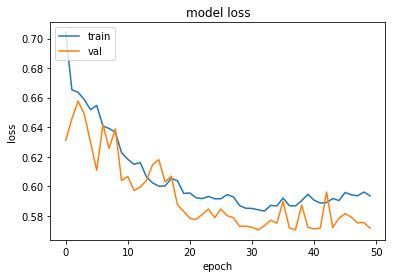

In [21]:
#PLOTS
import matplotlib.pyplot as plt

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [36]:
sum([model15[i].history['val_acc'][-1] for i in range(0,5)])/5

0.7027471565219883

In [48]:
from statistics import stdev 
#min1/5
print("accuracy 1-5: ", sum([model5[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 1-5: ", stdev([model5[i].history['val_acc'][-1] for i in range(0,5)])*100)
#min6/10
print("accuracy 6-10: ", sum([model10[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 6-10: ", stdev([model10[i].history['val_acc'][-1] for i in range(0,5)])*100)
#min11/15
print("accuracy 11-15: ", sum([model15[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 11-15: ", stdev([model15[i].history['val_acc'][-1] for i in range(0,5)])*100)
#min16/20
print("accuracy 16-21: ", sum([model20[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 16-21: ", stdev([model20[i].history['val_acc'][-1] for i in range(0,5)])*100)
#min21/25
print("accuracy 21-25: ", sum([model25[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 21-25: ", stdev([model25[i].history['val_acc'][-1] for i in range(0,5)])*100)

accuracy 1-5:  56.78040244906802
stdev 1-5:  0.3100620261988908
accuracy 6-10:  64.21872265695588
stdev 6-10:  0.7656017948044713
accuracy 11-15:  70.27471565219882
stdev 11-15:  0.24734815547430275
accuracy 16-21:  75.23584493253763
stdev 16-21:  0.4721758759849455
accuracy 21-25:  79.8058766434307
stdev 21-25:  0.39518361048319073


In [41]:
print("accuracy 6-10: ", sum([model10[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 6-10: ", stdev([model10[i].history['val_acc'][-1] for i in range(0,5)])*100)

accuracy 6-10:  64.21872265695588
stdev 6-10:  0.7656017948044713


In [44]:
#min21/25
print("accuracy 21-25: ", sum([model25[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 21-25: ", stdev([model25[i].history['val_acc'][-1] for i in range(0,5)])*100)

accuracy 21-25:  79.8058766434307
stdev 21-25:  0.39518361048319073


In [46]:
print("accuracy 16-21: ", sum([model20[i].history['val_acc'][-1] for i in range(0,5)])/5*100)
print("stdev 16-21: ", stdev([model20[i].history['val_acc'][-1] for i in range(0,5)])*100)

accuracy 16-21:  75.23584493253763
stdev 16-21:  0.4721758759849455
